In [1]:
import glob
from tqdm import tqdm
from tqdm import trange
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
import numpy as np

In [2]:
def load_cache(save_dir, experiment, expid, metric):
    exp_path = f"{save_dir}/{experiment}/{expid}"
    step_names = glob.glob(f"{exp_path}/metrics/*.tar")
    step_list = [int(s.split(".tar")[0].split("step")[1]) for s in step_names]
    steps, cache = [], []
    for in_filename, step in tqdm(sorted(list(zip(step_names, step_list)), key=lambda x: x[1])):
        checkpoint = torch.load(in_filename)
        if metric in checkpoint.keys():
            steps.append(step)
            cache.append(checkpoint[metric])
    return steps, cache

In [3]:
def style_axes(ax, numyticks=5, numxticks=5):
    ax.tick_params(axis="y", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,labelsize=24)
    ax.yaxis.set_major_locator(plt.MaxNLocator(numyticks))
    
    ax.tick_params(axis="x", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.5,pad=8,
                   labelsize=24)
    ax.xaxis.set_major_locator(plt.MaxNLocator(numxticks))
    #ax.ticklabel_format(axis="x", style="scientific", scilimits=(0,0), useMathText=True)
    ax.ticklabel_format(axis="x", useMathText=True)
    ax.xaxis.offsetText.set_fontsize(20)

    # boundary
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    for dir in ["top", "bottom", "right", "left"]:
        ax.spines[dir].set_linewidth(3)

# Example Figure

100%|██████████| 100/100 [00:00<00:00, 6409.88it/s]


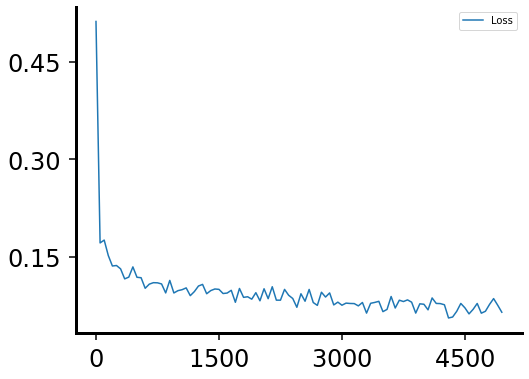

In [6]:
# SGDm
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
CACHE_PATH = "../results_others"
experiment = "fnn_cifar5k_2"
metric = "train_loss"

x, y = load_cache(CACHE_PATH, experiment, '', metric)
axes.plot(x, y, label="Loss")
style_axes(axes)
plt.legend()
plt.show()

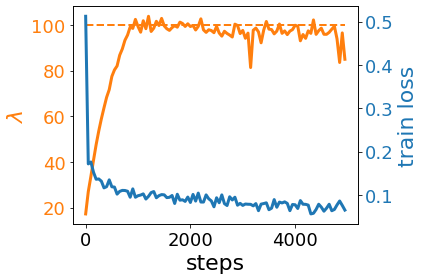

In [26]:
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('steps', fontsize=22)
ax1.set_ylabel(r'$\lambda$', fontsize=22, color=color)
ax1.plot(xx, mu, color=color, linewidth=3.0)
ax1.plot(xx, 100.0*np.ones(len(xx)), '--', color=color, linewidth=2.0)
ax1.tick_params(axis='y', labelcolor=color, labelsize=18)
ax1.tick_params(axis='x', labelsize=18)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('train loss', color=color, fontsize=22)  # we already handled the x-label with ax1
ax2.plot(xx, y, color=color, linewidth=3.0)
ax2.tick_params(axis='y', labelcolor=color, labelsize=18)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig("eos.png", bbox_inches="tight")
plt.show()

100%|██████████| 1001/1001 [00:00<00:00, 8375.04it/s]


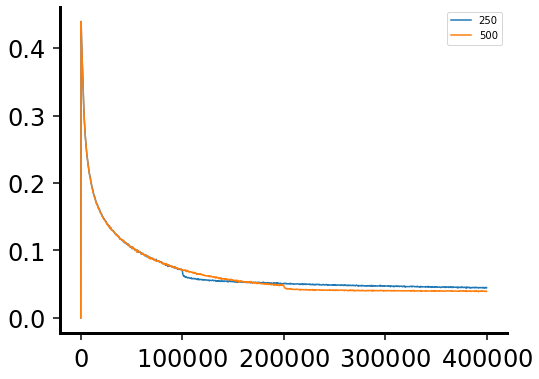

In [32]:
# AdaP
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
CACHE_PATH = "../results_others"
experiment = "lrdecay"
metric = "train_loss"

#x, y = load_cache(CACHE_PATH, experiment, '3040', metric)
#axes.plot(x, y, label="30 40")
#x, y = load_cache(CACHE_PATH, experiment, '3050', metric)
#axes.plot(x, y, label="30 50")
#x, y = load_cache(CACHE_PATH, experiment, '3060', metric)
#axes.plot(x, y, label="30 60")
x, y = load_cache(CACHE_PATH, experiment, '250', metric)
axes.plot(x, y, label="250")
x, y = load_cache(CACHE_PATH, experiment, '500', metric)
axes.plot(x, y, label="500")
#x, y = load_cache(CACHE_PATH, experiment, '750', metric)
#axes.plot(x, y, label="750")
#x, y = load_cache(CACHE_PATH, experiment, '150', metric)
#axes.plot(x, y, label="150")
#x, y = load_cache(CACHE_PATH, experiment, 'long', metric)
#axes.plot(x, y, label="long")
#axes.plot([12000,12000], [0,100], 'r')
style_axes(axes)
plt.legend()
#plt.xlim([20000,70000])
#plt.ylim([80,90])
plt.show()

In [44]:
CACHE_PATH = "../results_others"
experiment = "lrdecay"
x1, train1 = load_cache(CACHE_PATH, experiment, '250', "train_loss")
x2, train2 = load_cache(CACHE_PATH, experiment, '500', "train_loss")
_, test1 = load_cache(CACHE_PATH, experiment, '250', "test_accuracy1")
_, test2 = load_cache(CACHE_PATH, experiment, '500', "test_accuracy1")
x1 = [x/400 for x in x1]
x2 = [x/400 for x in x2]

100%|██████████| 1001/1001 [00:00<00:00, 8793.81it/s]


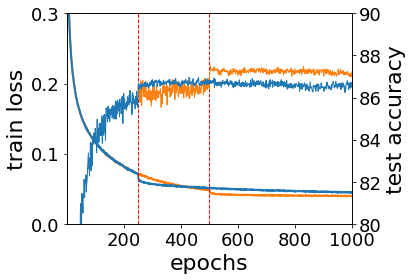

In [53]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('epochs', fontsize=22)
ax1.set_ylabel('train loss', fontsize=22)
ax1.plot(x2, train2, color="tab:orange", linewidth=2.0)
ax1.plot(x1, train1, color="tab:blue", linewidth=2.0)
ax1.plot([250,250], [0,1], "--", color="red", linewidth=1.0)
ax1.plot([500,500], [0,1], "--", color="red", linewidth=1.0)
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_xlim(1, 1000)
ax1.set_ylim(0, 0.3)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('test accuracy', fontsize=22)  # we already handled the x-label with ax1
ax2.plot(x1[250:], test2[250:], color="tab:orange", linewidth=1.0)
ax2.plot(x1, test1, color="tab:blue", linewidth=1.0)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylim(80, 90)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig("lrdecay_loss.png", bbox_inches="tight")
plt.show()

100%|██████████| 532/532 [00:13<00:00, 39.69it/s]


75.31


100%|██████████| 532/532 [00:15<00:00, 35.08it/s]


75.14


100%|██████████| 532/532 [00:16<00:00, 32.16it/s]


75.08


100%|██████████| 532/532 [00:00<00:00, 2023.34it/s]


75.08


100%|██████████| 532/532 [00:00<00:00, 2040.98it/s]


74.95


100%|██████████| 532/532 [00:00<00:00, 2051.60it/s]


74.87


100%|██████████| 532/532 [00:00<00:00, 2065.36it/s]


74.26


100%|██████████| 532/532 [00:00<00:00, 2065.57it/s]


73.71


100%|██████████| 532/532 [00:00<00:00, 2069.98it/s]


73.64


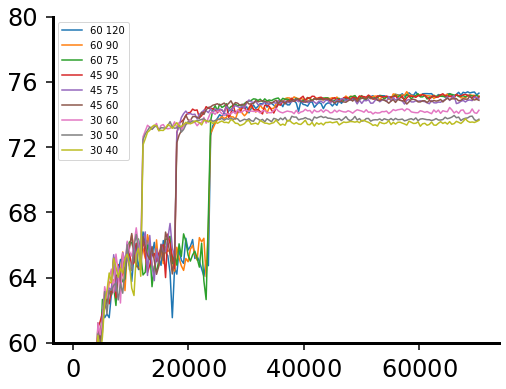

In [49]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
CACHE_PATH = "../results/cifar100"
experiment = "resnet18/adap"
metric = "test_accuracy1"

x, y = load_cache(CACHE_PATH, experiment, '01', metric)
print(y[-1])
axes.plot(x, y, label="60 120")
x, y = load_cache(CACHE_PATH, experiment, '02', metric)
print(y[-1])
axes.plot(x, y, label="60 90")
x, y = load_cache(CACHE_PATH, experiment, '03', metric)
print(y[-1])
axes.plot(x, y, label="60 75")
x, y = load_cache(CACHE_PATH, experiment, '06', metric)
print(y[-1])
axes.plot(x, y, label="45 90")
x, y = load_cache(CACHE_PATH, experiment, '07', metric)
print(y[-1])
axes.plot(x, y, label="45 75")
x, y = load_cache(CACHE_PATH, experiment, '08', metric)
print(y[-1])
axes.plot(x, y, label="45 60")
x, y = load_cache(CACHE_PATH, experiment, '09', metric)
print(y[-1])
axes.plot(x, y, label="30 60")
x, y = load_cache(CACHE_PATH, experiment, '10', metric)
print(y[-1])
axes.plot(x, y, label="30 50")
x, y = load_cache(CACHE_PATH, experiment, '11', metric)
print(y[-1])
axes.plot(x, y, label="30 40")
style_axes(axes)
plt.legend()
#plt.xlim([20000,70000])
plt.ylim([60,80])
plt.show()

100%|██████████| 532/532 [00:00<00:00, 2050.87it/s]


77.37


100%|██████████| 532/532 [00:00<00:00, 2059.64it/s]


72.92


100%|██████████| 532/532 [00:00<00:00, 2061.59it/s]


70.09


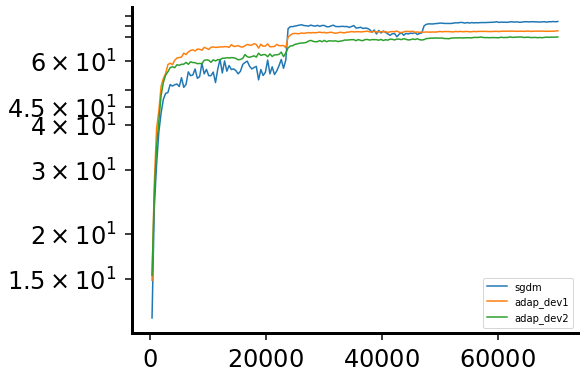

In [46]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows))
CACHE_PATH = "../results/cifar100"
experiment = "resnet18"
metric = "test_accuracy1"

x, y = load_cache(CACHE_PATH, experiment, 'sgdm/01', metric)
print(y[-1])
axes.plot(x[1:], y[1:], label="sgdm")
x, y = load_cache(CACHE_PATH, experiment, 'adap_dev/01', metric)
print(y[-1])
axes.semilogy(x[1:], y[1:], label="adap_dev1")
x, y = load_cache(CACHE_PATH, experiment, 'adap_dev/03', metric)
print(y[-1])
axes.semilogy(x[1:], y[1:], label="adap_dev2")
#x, y = load_cache(CACHE_PATH, experiment, '08', metric)
#print(y[-1])
#axes.semilogy(x[1:], y[1:], label="45 60")
#x, y = load_cache(CACHE_PATH, experiment, '09', metric)
#print(y[-1])
#axes.semilogy(x[1:], y[1:], label="30 60")
#x, y = load_cache(CACHE_PATH, experiment, '10', metric)
#print(y[-1])
#axes.semilogy(x[1:], y[1:], label="30 50")
#x, y = load_cache(CACHE_PATH, experiment, '11', metric)
#print(y[-1])
#axes.semilogy(x[1:], y[1:], label="30 40")
style_axes(axes)
plt.legend()
#plt.xlim([20000,70000])
#plt.ylim([60,80])
plt.show()